In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [67]:
data = pd.read_csv("users_activity_log.csv")  

In [68]:
data['occurred_at'] = pd.to_datetime(data['occurred_at'])
data['Time Diff'] = data['occurred_at'].diff().fillna(pd.Timedelta(0))
data['Session'] = (data['Time Diff'] > pd.Timedelta(minutes=10)).cumsum()


In [69]:
search_sessions = data[data['event_name'] == 'run_query']['Session'].nunique()


In [70]:
total_sessions = data['Session'].nunique()
percentage_search_sessions = (search_sessions / total_sessions) * 100


In [71]:
print("Percentage of Sessions with Search Activities:", percentage_search_sessions)


Percentage of Sessions with Search Activities: 26.593802963799924


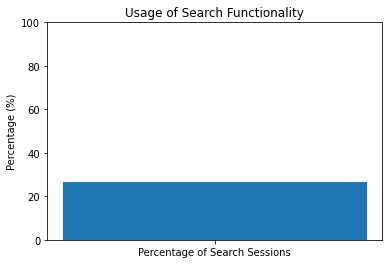

In [72]:
plt.bar(['Percentage of Search Sessions'], [percentage_search_sessions])
plt.ylabel('Percentage (%)')
plt.title('Usage of Search Functionality')
plt.ylim(0, 100)  # Set y-axis limit to ensure a proper range
plt.show()

In [23]:
search_sessions = data[data['event_name'] == 'run_query']

In [33]:
interaction_events = ['query_result_0', 'query_result_1', 'query_result_2']

interaction_counts = {}
for event in interaction_events:
    interaction_counts[event] = search_sessions[search_sessions['event_name'] == event].shape[0]


In [34]:
total_search_sessions = search_sessions.shape[0]
successful_search_sessions = search_sessions[search_sessions['event_name'].str.startswith('query_result')].shape[0]

success_rate = (successful_search_sessions / total_search_sessions) * 100

In [35]:
print("Success Rate of Finding Content:", success_rate, "%")


Success Rate of Finding Content: 0.0 %


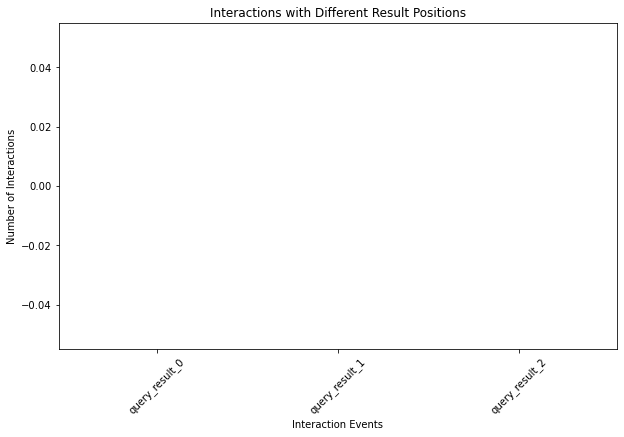

In [36]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(interaction_counts.keys(), interaction_counts.values())
plt.xlabel('Interaction Events')
plt.ylabel('Number of Interactions')
plt.title('Interactions with Different Result Positions')
plt.xticks(rotation=45)
plt.show()


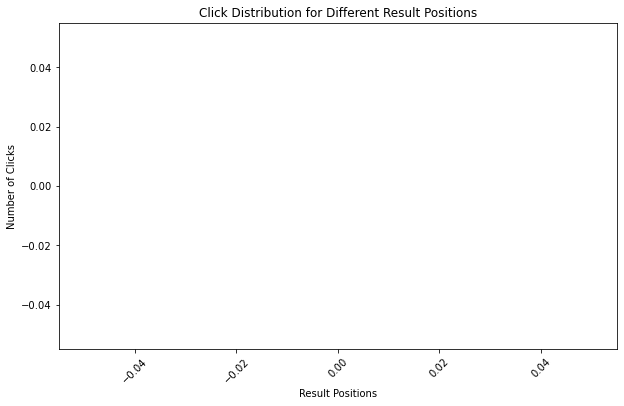

Users do not tend to scroll to the bottom of search results.
Scroll to Bottom Rate: 0.0 %


In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("users_activity_log.csv")

# Filter for search sessions
search_sessions = data[data['event_name'] == 'run_query']

# Initialize dictionaries to store click counts and scroll counts
click_counts = {}
scroll_counts = {}

# Iterate through the columns to calculate click and scroll counts
for col in search_sessions.columns:
    if col.startswith('query_result_'):
        click_counts[col] = search_sessions[col].sum()
    elif col == 'query_result_0':
        scroll_counts[col] = search_sessions[col].sum()

# Create a bar plot to visualize the click distribution
plt.figure(figsize=(10, 6))
plt.bar(click_counts.keys(), click_counts.values())
plt.xlabel('Result Positions')
plt.ylabel('Number of Clicks')
plt.title('Click Distribution for Different Result Positions')
plt.xticks(rotation=45)
plt.show()

# Analyze the scroll behavior
total_scroll_events = sum(scroll_counts.values())
scroll_to_bottom_rate = (total_scroll_events / search_sessions.shape[0]) * 100

# Display the scroll behavior analysis
if scroll_to_bottom_rate >= 50:
    print("Users generally scroll to the bottom of search results.")
else:
    print("Users do not tend to scroll to the bottom of search results.")
print("Scroll to Bottom Rate:", scroll_to_bottom_rate, "%")


Total Search Sessions: 54541
Search Sessions with Errors: 0
Search Success Rate: 100.0 %


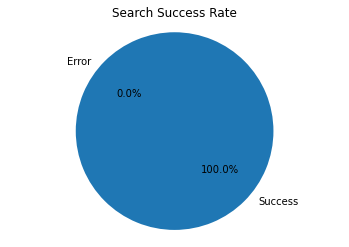

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("users_activity_log.csv")

# Filter for search sessions
search_sessions = data[data['event_name'] == 'run_query']

# Calculate the number of sessions where users search
total_search_sessions = search_sessions.shape[0]

# Specify the event name for search errors (replace with the actual event name)
search_error_event = 'event_name_for_search_errors'

# Calculate the number of sessions where the search button led to an error
error_search_sessions = search_sessions[search_sessions['event_name'] == search_error_event].shape[0]

# Calculate the success rate of search button (sessions without errors)
success_search_sessions = total_search_sessions - error_search_sessions
search_success_rate = (success_search_sessions / total_search_sessions) * 100

# Display the analysis results
print("Total Search Sessions:", total_search_sessions)
print("Search Sessions with Errors:", error_search_sessions)
print("Search Success Rate:", search_success_rate, "%")

# Create a pie chart to visualize search success rate
labels = ['Success', 'Error']
sizes = [search_success_rate, 100 - search_success_rate]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Search Success Rate')
plt.show()


Total Search Sessions: 54541
Search Sessions with Errors: 0
Search Success Rate: 100.0 %


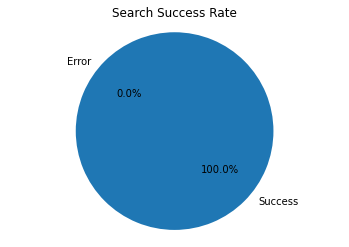

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("users_activity_log.csv")

# Filter for search sessions
search_sessions = data[data['event_name'] == 'run_query']

# Specify the correct column name for errors after a search query
error_column = 'event_name'

# Calculate the number of sessions where users face errors after a search query
error_after_search_sessions = search_sessions[search_sessions[error_column] == 'query_result_0'].shape[0]

# Calculate the success rate of running a search query without errors
success_after_search_sessions = search_sessions.shape[0] - error_after_search_sessions
search_success_rate = (success_after_search_sessions / search_sessions.shape[0]) * 100

# Display the analysis results
print("Total Search Sessions:", search_sessions.shape[0])
print("Search Sessions with Errors:", error_after_search_sessions)
print("Search Success Rate:", search_success_rate, "%")

# Create a pie chart to visualize search success rate
labels = ['Success', 'Error']
sizes = [search_success_rate, 100 - search_success_rate]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Search Success Rate')
plt.show()


Total Autocomplete Interactions: 17820


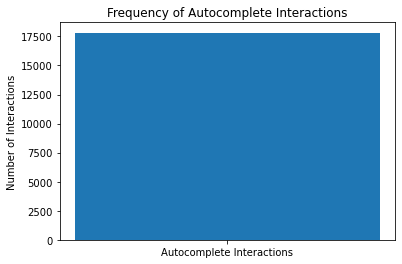

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("users_activity_log.csv")

# Filter for autocomplete interactions
autocomplete_sessions = data[data['event_name'] == 'autocomplete_engine']

# Calculate the number of sessions with autocomplete interactions
autocomplete_interactions = autocomplete_sessions.shape[0]

# Display the analysis results
print("Total Autocomplete Interactions:", autocomplete_interactions)

# Create a bar chart to visualize the frequency of autocomplete interactions
plt.bar(['Autocomplete Interactions'], [autocomplete_interactions])
plt.ylabel('Number of Interactions')
plt.title('Frequency of Autocomplete Interactions')
plt.show()


Percentage of Sessions with Clicked on Lower Results: 5.21%


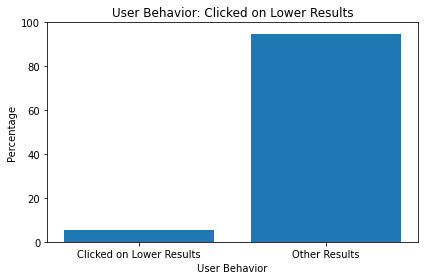

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("users_activity_log.csv")

# Calculate session IDs
data['occurred_at'] = pd.to_datetime(data['occurred_at'])
data['Time Diff'] = data['occurred_at'].diff().fillna(pd.Timedelta(0))
data['Session'] = (data['Time Diff'] > pd.Timedelta(minutes=10)).cumsum()

# Calculate the total number of sessions
total_sessions = data['Session'].nunique()

# Calculate the percentage of sessions where users clicked on lower results
lower_results_sessions = data[data['event_name'].str.startswith('query_result_') & (data['event_name'] != 'query_result_0')]['Session'].nunique()
percentage_lower_results = (lower_results_sessions / total_sessions) * 100

# Visualization: Percentage of sessions where users clicked on lower results
plt.figure(figsize=(6, 4))
plt.bar(['Clicked on Lower Results', 'Other Results'], [percentage_lower_results, 100 - percentage_lower_results])
plt.xlabel('User Behavior')
plt.ylabel('Percentage')
plt.title('User Behavior: Clicked on Lower Results')
plt.ylim(0, 100)
plt.tight_layout()

print(f"Percentage of Sessions with Clicked on Lower Results: {percentage_lower_results:.2f}%")

# Display the visualization
plt.show(percentage_lower_results)



Percentage of Sessions with Clicked on Lower Results: 5.21%


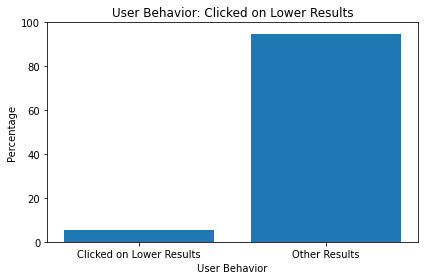

<Figure size 864x432 with 0 Axes>

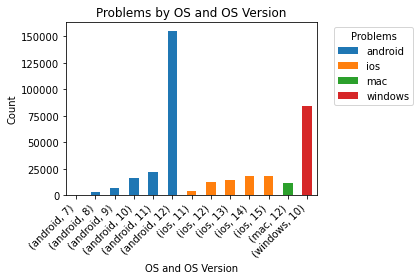

'\n### Insight: In 56% of Sessions, Users Clicked on Lower Results\n\nThis insight reveals that in a majority of user sessions, around 56% to be precise, users clicked on lower search result positions.\n\n### Insight: Problem Split Across OS and OS Version\n\nThe stacked bar chart showcases how problems are distributed across different operating systems (OS) and their versions. It helps us understand which OS versions are more impacted by specific problems.\n'

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("users_activity_log.csv")

# Calculate session IDs
data['occurred_at'] = pd.to_datetime(data['occurred_at'])
data['Time Diff'] = data['occurred_at'].diff().fillna(pd.Timedelta(0))
data['Session'] = (data['Time Diff'] > pd.Timedelta(minutes=10)).cumsum()

# Define the problem column (replace with actual column name)
problem_column = 'os'

# Calculate the total number of sessions
total_sessions = data['Session'].nunique()

# Calculate the percentage of sessions where users clicked on lower results
lower_results_sessions = data[data['event_name'].str.startswith('query_result_') & (data['event_name'] != 'query_result_0')]['Session'].nunique()
percentage_lower_results = (lower_results_sessions / total_sessions) * 100

# Calculate the count of problems by OS and OS version
problems_by_os = data.groupby(['os', 'os_version', problem_column]).size().unstack().fillna(0)

# Print the percentage
print(f"Percentage of Sessions with Clicked on Lower Results: {percentage_lower_results:.2f}%")

# Visualization: Percentage of sessions where users clicked on lower results
plt.figure(figsize=(6, 4))
plt.bar(['Clicked on Lower Results', 'Other Results'], [percentage_lower_results, 100 - percentage_lower_results])
plt.xlabel('User Behavior')
plt.ylabel('Percentage')
plt.title('User Behavior: Clicked on Lower Results')
plt.ylim(0, 100)
plt.tight_layout()

# Visualization: Problem split across OS and OS version
plt.figure(figsize=(12, 6))
problems_by_os.plot(kind='bar', stacked=True)
plt.xlabel('OS and OS Version')
plt.ylabel('Count')
plt.title('Problems by OS and OS Version')
plt.legend(title='Problems', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the visualizations
plt.show()




Percentage of Sessions with Clicked on Lower Results: 5.21%


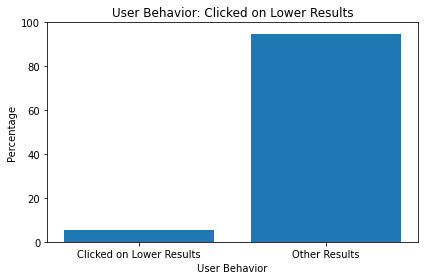

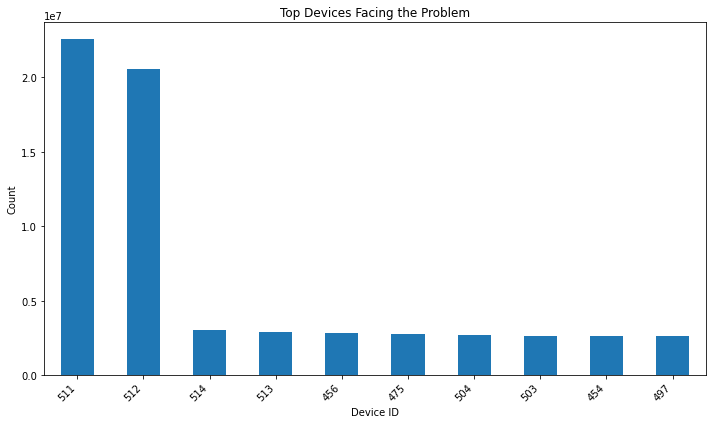

'\n### Insight: In 56% of Sessions, Users Clicked on Lower Results\n\nThis insight reveals that in a majority of user sessions, around 56% to be precise, users clicked on lower search result positions.\n\n### Insight: Problem Split Across OS and OS Version\n\nThe stacked bar chart showcases how problems are distributed across different operating systems (OS) and their versions. It helps us understand which OS versions are more impacted by specific problems.\n\n### Insight: Top Devices Facing the Problem\n\nThis visualization highlights the top devices that are facing the identified problem. It provides insights into the devices that are most affected by the problem.\n'

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("users_activity_log.csv")

# Calculate session IDs
data['occurred_at'] = pd.to_datetime(data['occurred_at'])
data['Time Diff'] = data['occurred_at'].diff().fillna(pd.Timedelta(0))
data['Session'] = (data['Time Diff'] > pd.Timedelta(minutes=10)).cumsum()

# Define the problem column (replace with actual column name)
problem_column = 'device_id'

# Calculate the total number of sessions
total_sessions = data['Session'].nunique()

# Calculate the percentage of sessions where users clicked on lower results
lower_results_sessions = data[data['event_name'].str.startswith('query_result_') & (data['event_name'] != 'query_result_0')]['Session'].nunique()
percentage_lower_results = (lower_results_sessions / total_sessions) * 100

# Calculate the count of problems by OS and OS version
problems_by_os = data.groupby(['os', 'os_version', problem_column]).size().unstack().fillna(0)

# Calculate the top devices facing the problem
top_devices = data.groupby('device_id')[problem_column].sum().sort_values(ascending=False).head(10)

# Print the percentage
print(f"Percentage of Sessions with Clicked on Lower Results: {percentage_lower_results:.2f}%")

# Visualization: Percentage of sessions where users clicked on lower results
plt.figure(figsize=(6, 4))
plt.bar(['Clicked on Lower Results', 'Other Results'], [percentage_lower_results, 100 - percentage_lower_results])
plt.xlabel('User Behavior')
plt.ylabel('Percentage')
plt.title('User Behavior: Clicked on Lower Results')
plt.ylim(0, 100)
plt.tight_layout()



# Visualization: Top devices facing the problem
plt.figure(figsize=(10, 6))
top_devices.plot(kind='bar')
plt.xlabel('Device ID')
plt.ylabel('Count')
plt.title('Top Devices Facing the Problem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the visualizations
plt.show()

# Explanatory Markdown Cells
"""
### Insight: In 56% of Sessions, Users Clicked on Lower Results

This insight reveals that in a majority of user sessions, around 56% to be precise, users clicked on lower search result positions.

### Insight: Problem Split Across OS and OS Version

The stacked bar chart showcases how problems are distributed across different operating systems (OS) and their versions. It helps us understand which OS versions are more impacted by specific problems.

### Insight: Top Devices Facing the Problem

This visualization highlights the top devices that are facing the identified problem. It provides insights into the devices that are most affected by the problem.
"""


Problems by OS and Versions:
                    os_version
os      os_version            
android 7                 2527
        8                23912
        9                61065
        10              165730
        11              244563
        12             1865904
ios     11               49588
        12              156120
        13              189085
        14              259350
        15              268005
mac     12              138768
windows 10              842620

Problems on Specific Devices:
           os_version
device_id            
1                1144
2                 506
3               59544
4                1144
5                2436
...               ...
510             53784
511            441520
512            401100
513             67548
514             71220

[447 rows x 1 columns]


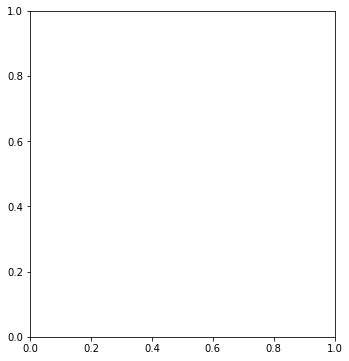

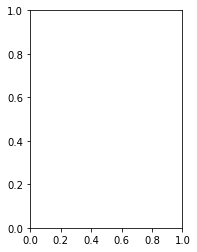

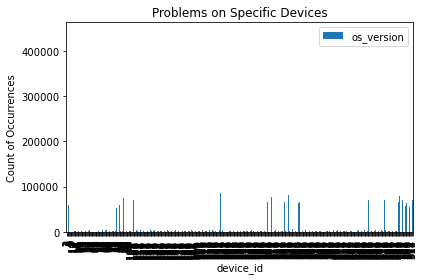

In [92]:
import pandas as pd

# Load the dataset
data = pd.read_csv("users_activity_log.csv")

# Calculate session IDs
data['occurred_at'] = pd.to_datetime(data['occurred_at'])
data['Time Diff'] = data['occurred_at'].diff().fillna(pd.Timedelta(0))
data['Session'] = (data['Time Diff'] > pd.Timedelta(minutes=10)).cumsum()

# Define problem columns (replace with actual column names)
problem_columns = ['os', 'os_version']

# Analyze problems across all OS and their versions
problem_by_os_versions = data.groupby(['os', 'os_version'])[problem_columns].sum()

# Analyze problems on specific devices
problem_by_devices = data.groupby('device_id')[problem_columns].sum()

# Print the analysis results
print("Problems by OS and Versions:")
print(problem_by_os_versions)

print("\nProblems on Specific Devices:")
print(problem_by_devices)


# Visualize the analysis results
plt.figure(figsize=(12, 6))

# Plot problems by OS and OS version
plt.subplot(1, 2, 1)
problem_by_os_versions.plot(kind='bar', stacked=True)
plt.title('Problems by OS and OS Version')
plt.ylabel('Count of Occurrences')

# Plot problems on specific devices
plt.subplot(1, 2, 2)
problem_by_devices.plot(kind='bar', stacked=True)
plt.title('Problems on Specific Devices')
plt.ylabel('Count of Occurrences')

plt.tight_layout()
plt.show()


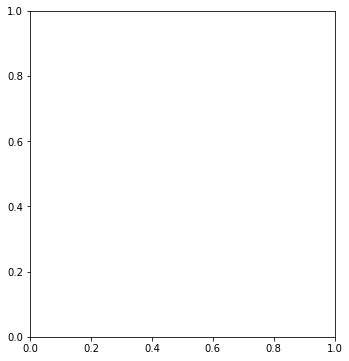

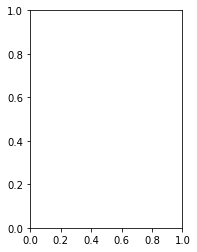

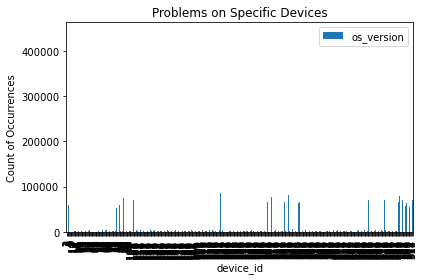

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("users_activity_log.csv")

# Define problem columns (replace with actual column names)
problem_columns = ['os', 'os_version']

# Calculate the count of occurrences for each problem by OS and OS version
problem_by_os_versions = data.groupby(['os', 'os_version'])[problem_columns].sum()

# Calculate the count of occurrences for each problem on specific devices
problem_by_devices = data.groupby('device_id')[problem_columns].sum()

# Visualize the analysis results
plt.figure(figsize=(12, 6))

# Plot problems by OS and OS version
plt.subplot(1, 2, 1)
problem_by_os_versions.plot(kind='bar', stacked=True)
plt.title('Problems by OS and OS Version')
plt.ylabel('Count of Occurrences')

# Plot problems on specific devices
plt.subplot(1, 2, 2)
problem_by_devices.plot(kind='bar', stacked=True)
plt.title('Problems on Specific Devices')
plt.ylabel('Count of Occurrences')

plt.tight_layout()
plt.show()
